## Уровень 0:##
- Создайте матрицу 3 на 3, заполненную числами от 1 до 9
- Прибавьте к ней матрицу с единицами на диагонале
- Умножьте полученную матрицу на вектор (1, 2, 3)
- Посчитайте обратную матрицу к полученной матрице

In [1]:
import numpy as np
from scipy import linalg

In [2]:
A = np.array(([1,2,3],[4,5,6],[7,8,9]))
B = np.eye(3)
vector = np.array(([1,2,3]))

In [3]:
C = A+B
print(C)

[[ 2.  2.  3.]
 [ 4.  6.  6.]
 [ 7.  8. 10.]]


In [4]:
D = C@vector
print(D)

[15. 34. 53.]


In [5]:
# логично предположить, что в задании требуется найти обратную матрицу от матрицы С, а не от D, 
# так как обратная матрица существует только у квадратных


C_inv = np.linalg.inv(C)

print(C_inv)

[[-6.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [-1.00000000e+00  5.00000000e-01  2.22044605e-17]
 [ 5.00000000e+00  1.00000000e+00 -2.00000000e+00]]


In [6]:
# проверка (с округлением выходит единичная матрица)

I = C_inv.dot(C)
print(I)

[[1.00000000e+00 3.55271368e-15 8.88178420e-16]
 [1.55431223e-16 1.00000000e+00 2.22044605e-16]
 [1.33226763e-15 0.00000000e+00 1.00000000e+00]]


## Уровень 1:##
Дан объект в 2d пространстве.

При помощи матричных операций выполните:
- Уменьшить объект в два раза.
- Повернуть на 130 градусов.
- Отразить объект относительно прямой y=x
- Выполнить смещение объекта и масштабирование (применить 2 матрицы трансформаций). Смещение на (200, 300) и масштабирование на (0.5, 1,2)

In [37]:
from matplotlib import pyplot as plt

(-200, 200)

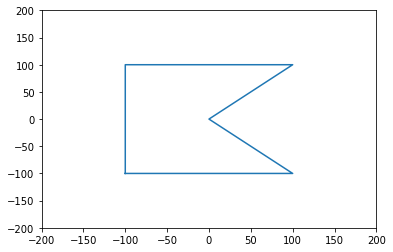

In [79]:
A = [
[-100, -100, 1],
[-100, 100, 1],
[100, 100, 1],
[0, 0, 1],
[100, -100, 1],
[-100, -100, 1]
]
A = np.array(A)
x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [39]:
# уменьшение в два раза

B = 0.5*A

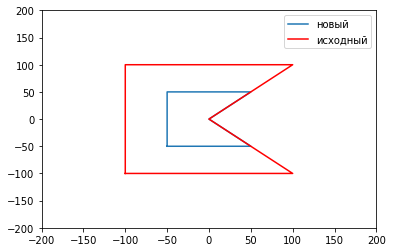

In [40]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)
x = A[:,0]
y = A[:,1]
plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])
plt.legend(['новый', 'исходный'])

In [41]:
# отражение на 130 градусов

from math import cos, sin, pi

def reflection(angle):

    theta = angle * 180/pi
    TransformArray = np.array([
        [cos(theta), sin(theta), 0],
        [-sin(theta), cos(theta), 0],
        [0, 0, 1]
    ])
    
    B = []
    for point in A:
        new_point=np.dot(TransformArray,np.transpose(point))
        B.append(new_point)
    B = np.array(B).astype(int)
    print(B)
    
    plt.figure(
    figsize=(8, 8),
    )
    x = B[:,0]
    y = B[:,1]
    plt.plot(x, y)

    plt.ylim([-200, 200])
    plt.xlim([-200, 200])

[[  70  122    1]
 [ 122  -70    1]
 [ -70 -122    1]
 [   0    0    1]
 [-122   70    1]
 [  70  122    1]]


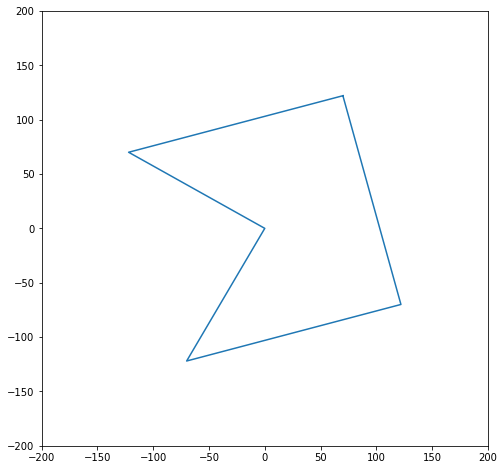

In [43]:
reflection(130)

In [44]:
# отражение объекта относительно прямой y=x (построила диагональ), матрицу отражения взяла с чата mds
# вопрос - именно такое отражение задумывалось?


TransformArray = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 1]
])

In [45]:
B = A@TransformArray

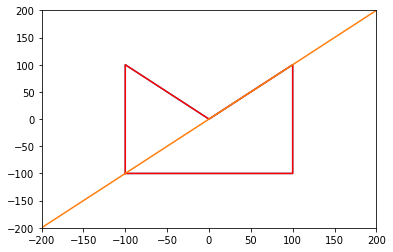

In [48]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)

plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([-200, 200])

x = [-200, 200];
y = [-200, 200];
plt.plot(x,y)

In [92]:
# смещение на 200 и масштабирование на 0,5

TransformArray = np.array([
    [0.5, 0, 0],
    [0, 0.5, 0],
    [0, 0, 0.5]
])

In [95]:
B = []
for point in A:
    point=point+[200, 0, 0]
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[ 50 -50   0]
 [ 50  50   0]
 [150  50   0]
 [100   0   0]
 [150 -50   0]
 [ 50 -50   0]]


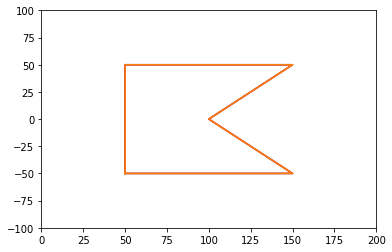

In [98]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)

plt.plot(x, y, color='r')
plt.ylim([-100, 100])
plt.xlim([0, 200])

plt.plot(x,y)

In [99]:
# смещение на 300 и масштабирование на 1,2

TransformArray = np.array([
    [1.2, 0, 0],
    [0, 1.2, 0],
    [0, 0, 1.2]
])

In [100]:
B = []
for point in A:
    point=point+[300, 0, 0]
    new_point=np.dot(TransformArray,np.transpose(point))
    B.append(new_point)
B = np.array(B).astype(int)
print(B)

[[ 240 -120    1]
 [ 240  120    1]
 [ 480  120    1]
 [ 360    0    1]
 [ 480 -120    1]
 [ 240 -120    1]]


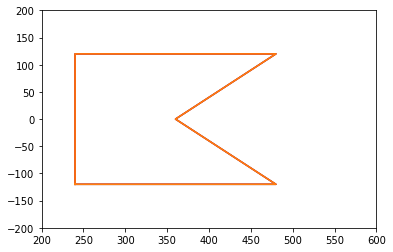

In [102]:
x = B[:,0]
y = B[:,1]
plt.plot(x, y)

plt.plot(x, y, color='r')
plt.ylim([-200, 200])
plt.xlim([200, 600])

plt.plot(x,y)